In [175]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [176]:
train_set = pd.read_csv("trainEmployeeData.csv")
test_set = pd.read_csv("testEmployeeData.csv")
train_set.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,388,42,No,Travel_Rarely,201,Research & Development,1,4,Life Sciences,1,...,2,80,1,8,5,3,5,2,1,2
1,262,32,No,Travel_Rarely,128,Research & Development,2,1,Technical Degree,1,...,4,80,0,9,5,3,6,2,0,4
2,904,48,No,Travel_Rarely,715,Research & Development,1,3,Life Sciences,1,...,3,80,0,25,3,4,1,0,0,0
3,87,51,No,Travel_Rarely,432,Research & Development,9,4,Life Sciences,1,...,2,80,2,10,4,3,4,2,0,3
4,1324,29,No,Travel_Rarely,726,Research & Development,29,1,Life Sciences,1,...,4,80,2,11,3,3,7,0,1,6


In [177]:
def transformTrainData(data):
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)
    numerical = data.columns.difference(categorical)
    data_cat = data[categorical]
    data_cat = pd.get_dummies(data_cat)
    data_num = data[numerical]
    return pd.concat([data_num, data_cat], axis=1).drop(['Over18_Y'],axis=1).drop(['Unnamed: 0'],axis=1
                                                                            ).drop(['EmployeeCount'],axis=1
                                                                            ).drop(['StandardHours'],axis=1)

def transformTestData(data):
    return data["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

In [178]:

# form x and y for train and test
y_train = transformTestData(train_set)
x_train = transformTrainData(train_set.drop(['Attrition'], axis=1))
y_test = transformTestData(test_set)
x_test = transformTrainData(test_set.drop(['Attrition'], axis=1))

print(x_train.dtypes)
x_train.head()

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCu

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,42,201,1,4,517,2,95,3,1,1,...,0,0,0,0,0,1,0,0,1,0
1,32,128,2,1,362,4,84,2,2,1,...,0,0,0,0,0,0,0,1,1,0
2,48,715,1,3,1263,4,76,2,5,4,...,0,1,0,0,0,0,0,1,1,0
3,51,432,9,4,116,4,96,3,1,4,...,0,0,0,0,0,0,1,0,1,0
4,29,726,29,1,1859,4,93,1,2,3,...,0,0,0,0,0,1,0,0,1,0


In [179]:
# Initial Logistic Regressison
model = LogisticRegression(penalty='l2', C=1,fit_intercept=True)
model.fit(x_train, y_train)
print("Training Accuracy: ", model.score(x_train, y_train))
print("Test Accuracy: ", model.score(x_test,y_test))


('Training Accuracy: ', 0.89200680272108845)
('Test Accuracy: ', 0.88095238095238093)


('Age', -0.70819741291974936)
('DailyRate', -0.34322844420361742)
('DistanceFromHome', -0.33882434361288144)
('Education', -0.33028449698068896)
('EmployeeNumber', -0.31465133607839002)
('EnvironmentSatisfaction', -0.29494939288662458)
('HourlyRate', -0.26576049230008447)
('JobInvolvement', -0.21421489216274217)
('JobLevel', -0.1806591203256217)
('JobSatisfaction', -0.17220630584831415)
('MonthlyIncome', -0.16005721614181426)
('MonthlyRate', -0.14353301950374708)
('NumCompaniesWorked', -0.13697159378407472)
('PercentSalaryHike', -0.11447738336635767)
('PerformanceRating', -0.10369353732538437)
('RelationshipSatisfaction', -0.096387766057814531)
('StockOptionLevel', -0.093751212549439536)
('TotalWorkingYears', -0.093750295828425506)
('TrainingTimesLastYear', -0.090106429670224447)
('WorkLifeBalance', -0.087807318331416015)
('YearsAtCompany', -0.083416219113116793)
('YearsInCurrentRole', -0.082960856123504054)
('YearsSinceLastPromotion', -0.069448552522238527)
('YearsWithCurrManager', -0

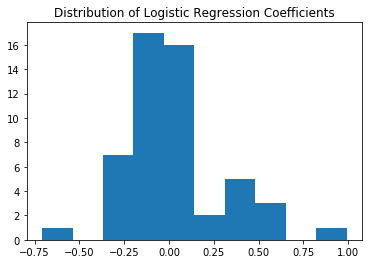

In [180]:
#display Logistic Regression coefficients
coef = [item for sublist in model.coef_ for item in sublist] #flatten model.coef_
coef = sorted(coef)
for idx, val in enumerate(coef):
    print(x_train.columns[idx],val)
plt.hist(coef)
plt.title("Distribution of Logistic Regression Coefficients")
plt.show()


In [181]:
#cross validation over different loss functions and regularization parameters


#code adapted from scikitlearn example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tuned_parameters = [{'penalty': ['l1'], 'C': [1, 10, 100, 1000], 'fit_intercept': [True]},
                    {'penalty': ['l2'], 'C': [1, 10, 100, 1000], 'fit_intercept': [True]}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5)
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(x_test)
print(classification_report(y_true, y_pred))
print()
pd.DataFrame(clf.grid_scores_)

Best parameters set found on development set:
()
{'penalty': 'l2', 'C': 1, 'fit_intercept': True}
()
Grid scores on development set:
()
0.881 (+/-0.028) for {'penalty': 'l1', 'C': 1, 'fit_intercept': True}
0.875 (+/-0.027) for {'penalty': 'l1', 'C': 10, 'fit_intercept': True}
0.875 (+/-0.029) for {'penalty': 'l1', 'C': 100, 'fit_intercept': True}
0.874 (+/-0.027) for {'penalty': 'l1', 'C': 1000, 'fit_intercept': True}
0.883 (+/-0.030) for {'penalty': 'l2', 'C': 1, 'fit_intercept': True}
0.872 (+/-0.022) for {'penalty': 'l2', 'C': 10, 'fit_intercept': True}
0.878 (+/-0.026) for {'penalty': 'l2', 'C': 100, 'fit_intercept': True}
0.872 (+/-0.027) for {'penalty': 'l2', 'C': 1000, 'fit_intercept': True}
()
Detailed classification report:
()
The model is trained on the full development set.
The scores are computed on the full evaluation set.
()
             precision    recall  f1-score   support

          0       0.90      0.97      0.93       248
          1       0.72      0.39      0.51

C:\Users\bened_000\.julia\v0.6\Conda\deps\usr\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,parameters,mean_validation_score,cv_validation_scores
0,"{u'penalty': u'l1', u'C': 1, u'fit_intercept':...",0.880952,"[0.860169491525, 0.885106382979, 0.88510638297..."
1,"{u'penalty': u'l1', u'C': 10, u'fit_intercept'...",0.875000,"[0.851694915254, 0.872340425532, 0.88085106383..."
2,"{u'penalty': u'l1', u'C': 100, u'fit_intercept...",0.875000,"[0.851694915254, 0.872340425532, 0.87659574468..."
3,"{u'penalty': u'l1', u'C': 1000, u'fit_intercep...",0.874150,"[0.851694915254, 0.872340425532, 0.87659574468..."
4,"{u'penalty': u'l2', u'C': 1, u'fit_intercept':...",0.882653,"[0.872881355932, 0.88085106383, 0.868085106383..."
5,"{u'penalty': u'l2', u'C': 10, u'fit_intercept'...",0.872449,"[0.877118644068, 0.855319148936, 0.86382978723..."
6,"{u'penalty': u'l2', u'C': 100, u'fit_intercept...",0.878401,"[0.864406779661, 0.885106382979, 0.86382978723..."
7,"{u'penalty': u'l2', u'C': 1000, u'fit_intercep...",0.872449,"[0.864406779661, 0.859574468085, 0.86808510638..."


('Age', -0.70819741291974936)
('DailyRate', -0.34322844420361742)
('DistanceFromHome', -0.33882434361288144)
('Education', -0.33028449698068896)
('EmployeeNumber', -0.31465133607839002)
('EnvironmentSatisfaction', -0.29494939288662458)
('HourlyRate', -0.26576049230008447)
('JobInvolvement', -0.21421489216274217)
('JobLevel', -0.1806591203256217)
('JobSatisfaction', -0.17220630584831415)
('MonthlyIncome', -0.16005721614181426)
('MonthlyRate', -0.14353301950374708)
('NumCompaniesWorked', -0.13697159378407472)
('PercentSalaryHike', -0.11447738336635767)
('PerformanceRating', -0.10369353732538437)
('RelationshipSatisfaction', -0.096387766057814531)
('StockOptionLevel', -0.093751212549439536)
('TotalWorkingYears', -0.093750295828425506)
('TrainingTimesLastYear', -0.090106429670224447)
('WorkLifeBalance', -0.087807318331416015)
('YearsAtCompany', -0.083416219113116793)
('YearsInCurrentRole', -0.082960856123504054)
('YearsSinceLastPromotion', -0.069448552522238527)
('YearsWithCurrManager', -0

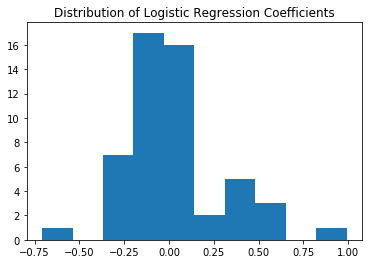

In [182]:
# Best logistic regression l2 penalty with c=1
model = LogisticRegression(penalty='l2', C=1,fit_intercept=True)
model.fit(x_train, y_train)

coef = [item for sublist in model.coef_ for item in sublist] #flatten model.coef_
coef = sorted(coef)
names = []
values = []
for idx, val in enumerate(coef):
    names.append(x_train.columns[idx])
    values.append(val)
    print(x_train.columns[idx],val)
plt.hist(coef)
plt.title("Distribution of Logistic Regression Coefficients")
plt.show()


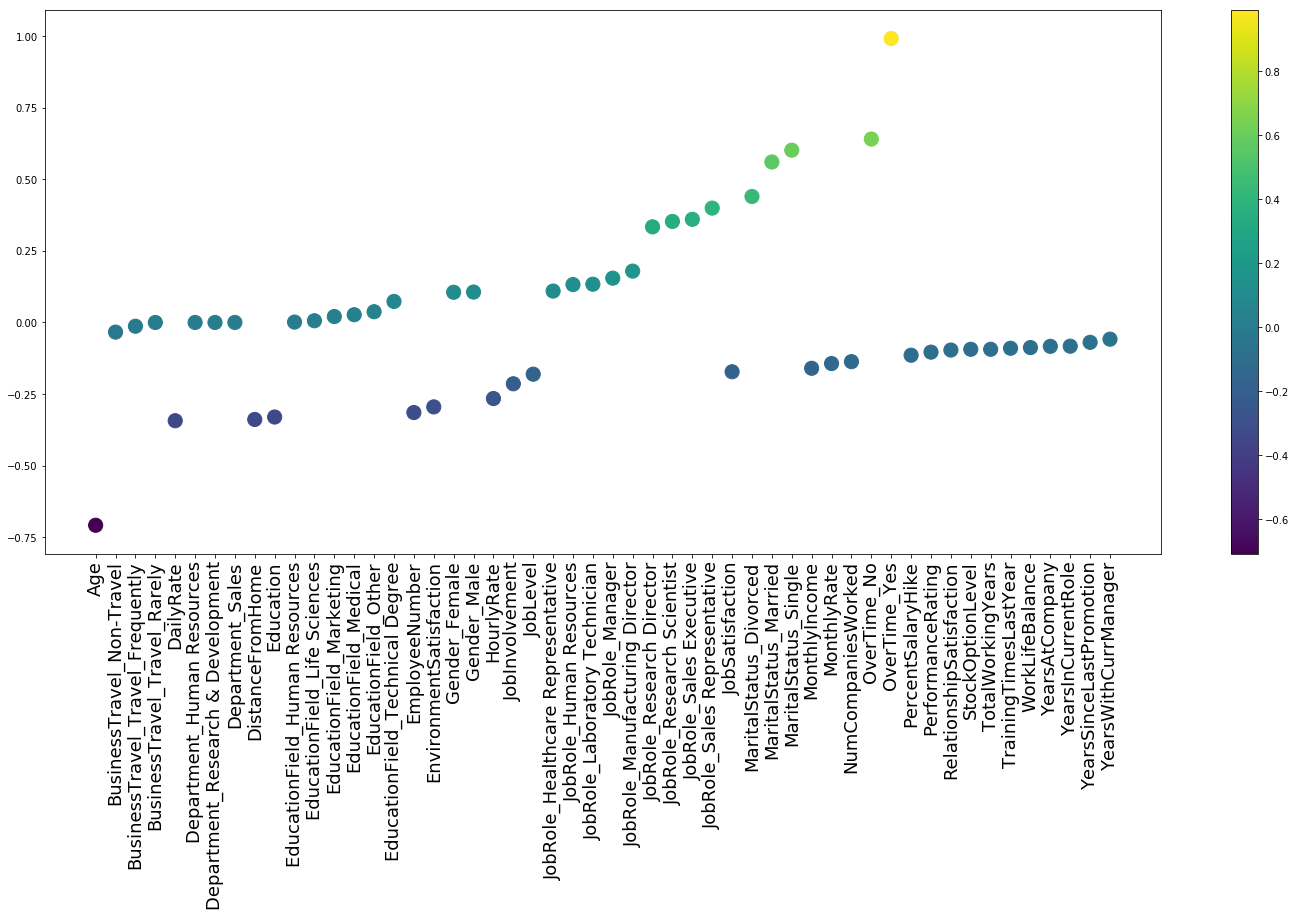

In [183]:
#visualize best models coefficients

#plt.figure(figsize=(80, 60), dpi= 80, facecolor='w', edgecolor='k')
#color maps options http://matplotlib.org/examples/color/colormaps_reference.html
plt.figure(figsize=(25,10))
plt.scatter(names, values,s=200,c=values,cmap=cm.viridis)
plt.xticks(rotation=90, fontsize = 18)
plt.colorbar()
plt.show()

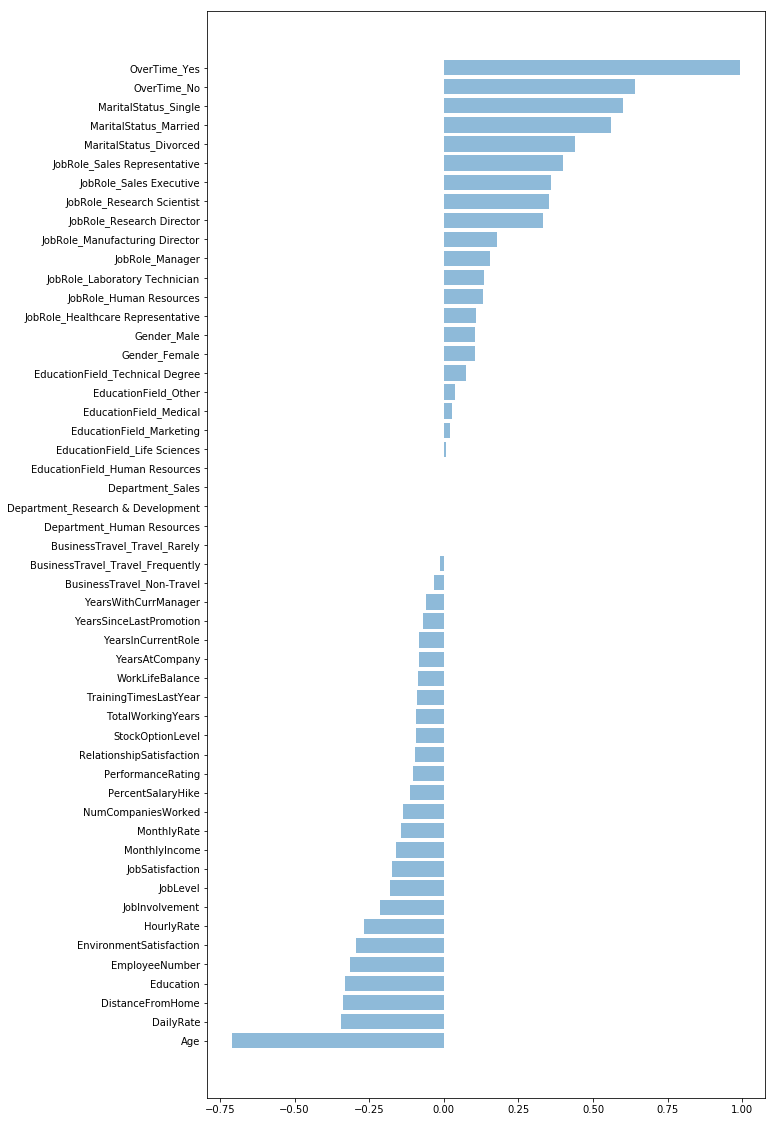

In [184]:
plt.figure(figsize=(10,20))
plt.barh(np.arange(len(names)), values,alpha=0.5)
plt.yticks(np.arange(len(names)),names)
plt.show()

In [185]:
def dropDepartmentData(data,d):
    return data.drop(["Department_"+d], axis=1)

In [186]:

#train_set.set_index(keys=['Department'], drop=False,inplace=True)
departments=train_set['Department'].unique().tolist()
for d in departments:
    print("generating model and data for department:",d)
    print("\n\n\n")
    df_train = train_set.loc[train_set.Department==d]
    df_test = test_set.loc[test_set.Department==d]
    dy_train = transformTestData(df_train)
    dx_train = dropDepartmentData(transformTrainData(df_train.drop(['Attrition'], axis=1)),d)

    dy_test = transformTestData(df_test)
    dx_test = dropDepartmentData(transformTrainData(df_test.drop(['Attrition'], axis=1)),d)
    #print(dx_test.head())
    model = LogisticRegression(penalty='l2', C=1,fit_intercept=True)
    model.fit(dx_train, dy_train)
    
    
    print("Training Accuracy: ", model.score(dx_train, dy_train))
    #print("Test Accuracy: ", model.score(dx_test,dy_test))
    print("\n\n\n")
    coef = [item for sublist in model.coef_ for item in sublist] #flatten model.coef_
    coef = sorted(coef)
    names = []
    values = []
    for idx, val in enumerate(coef):
        names.append(dx_train.columns[idx])
        values.append(val)
        print(dx_train.columns[idx],val)
    print("\n\n\n")
    #plt.hist(coef)
    #plt.title("Distribution of Logistic Regression Coefficients")
    #plt.show()


('generating model and data for department:', 'Research & Development')




('Training Accuracy: ', 0.89860583016476547)




('Age', -0.7142525471216562)
('DailyRate', -0.4305565817096943)
('DistanceFromHome', -0.3257623237711515)
('Education', -0.28327473702139017)
('EmployeeNumber', -0.1801657677570275)
('EnvironmentSatisfaction', -0.1749808452918416)
('HourlyRate', -0.16545675235968677)
('JobInvolvement', -0.16184346402919697)
('JobLevel', -0.15236353624566087)
('JobSatisfaction', -0.1427887575030882)
('MonthlyIncome', -0.14080910015082757)
('MonthlyRate', -0.12976942202374114)
('NumCompaniesWorked', -0.12558737655985469)
('PercentSalaryHike', -0.11136696056617643)
('PerformanceRating', -0.090567898389911389)
('RelationshipSatisfaction', -0.086169171116523322)
('StockOptionLevel', -0.079265588248798952)
('TotalWorkingYears', -0.072128415770965487)
('TrainingTimesLastYear', -0.069871667882612259)
('WorkLifeBalance', -0.045657971763177471)
('YearsAtCompany', -0.022601706953131198)
('Y